Import necessary packages to work with data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Load marketing data set

In [2]:
data = pd.read_csv("marketing_data.csv")

Preview first 5 rows of data

In [3]:
data.head()

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0             0             0   
1                  5             0             0             0             0   
2                  2             0             0             0             0   
3                  7             0             0             0             0   
4                  7             1             0             0             0   

   AcceptedCmp2  Response  Complain  Country  
0             0         1         0       SP  
1             1         1         0       CA  
2             0         0         0       US  
3             0         0         0      AUS  
4             0         1         0       SP  

[5 rows x 28 columns]

Display all column names, number of non-null rows per column and the data type of the column values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Shows the various (numerical) columns different statistics. Some columns only contain 1s and 0s which doesn't really translate into meaningful statistics.

In [5]:
data.describe()

ID   Year_Birth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumCatalogPurchases  NumStorePurchases  \
count       2240.000000  ...          2240.000000        2240.000000   
mean          27.062946  ...             2.662054           5.790179   
std           41.280498  ...             2.923101           3.250958   
min            0.000000  ...             0.000000           0.000000   
25%            1.000000  ...             0.000000           3.000000   
50%            8.000000  ...             2.000000           5.000000   
75%           33.000000  ...             4.000000           8.000000   
max          263.000000  ...            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Response     Complain  
count   2240.000000   2240.000000  2240.000000  2240.000000  
mean       0.064286      0.013393     0.149107     0.009375  
std        0.245316      0.114976     0.356274     0.096391  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000  

[8 rows x 23 columns]

One way to show the column(s) with missing data (if any) - Income column is missing data

In [6]:
missing_data = data.isnull().sum() / data.shape[0] * 100
missing_data

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
 Income                1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Response               0.000000
Complain               0.000000
Country                0.000000
dtype: float64

---------------------------------------------------------------------------------------------------------------

'Income' name is actually ' Income', there is a space in front of the 'I' - let's get rid of the space

In [7]:
data.columns = data.columns.str.replace(' ', '')

Before dealing with the missing 'Income' data, let's change the data type from object to a number (float)

In [8]:
data['Income'] = data['Income'].str.replace('$', '')
data['Income'] = data['Income'].str.replace(',', '').astype('float')

Fill in missing Income values with the median income of the whole column

In [9]:
data['Income'].fillna((data['Income'].median()), inplace=True)

Should change the data type of the 'Dt_Customer' column from object to datetime

In [10]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

We can see that no columns are missing data, Income is now a float and Dt_Customer is datetime

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

---------------------------------------------------------------------------------------------------------------

Visual 1 of the 'Income' column

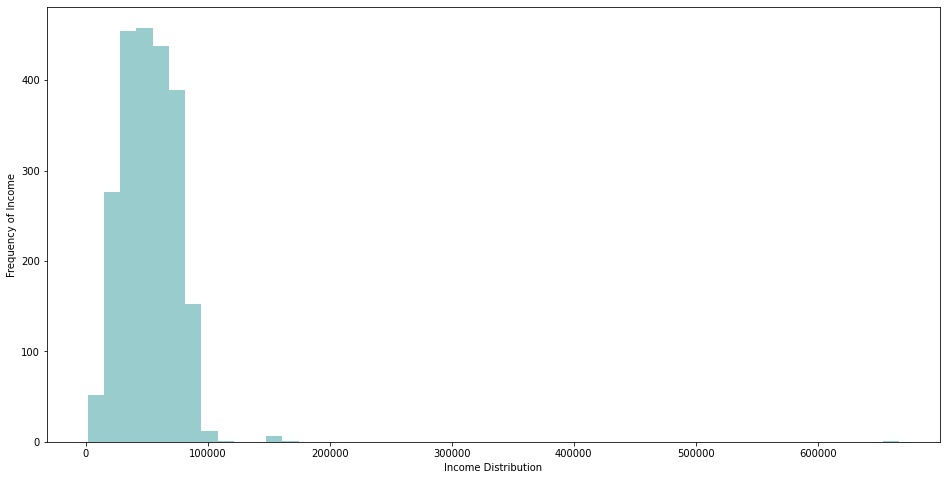

In [12]:
plt.figure(figsize=(16,8))
sns.distplot(data['Income'], kde=False, hist=True, color='teal')
plt.xlabel('Income Distribution')
plt.ylabel('Frequency of Income');

Visual 2 of the 'Income' column

<AxesSubplot:>

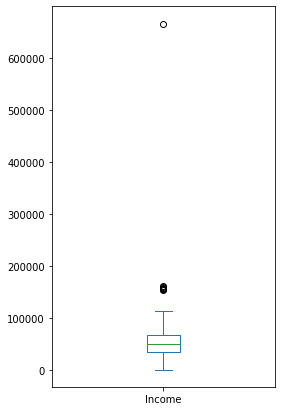

In [13]:
data['Income'].plot(kind='box', figsize=(4,7))

The first visual for Income shows overall that the majority of the income values are between 0 and 110,000. There's a small group around the 150,000 to 175,000 range as well.
However, the first visual doesn't make it clear to see the large outlier that is past 600,000. Using the boxplot we can again confirm what we see in the first visual.
Additionally, it becomes more evident that there is an outlier at the top of the chart.

In [14]:
data['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

Using .describe() on the Income column to compare the boxplot statistics shown, we can see the outlier value (666,666.00) and that both the mean and median income values are quite similar.

---------------------------------------------------------------------------------------------------------------

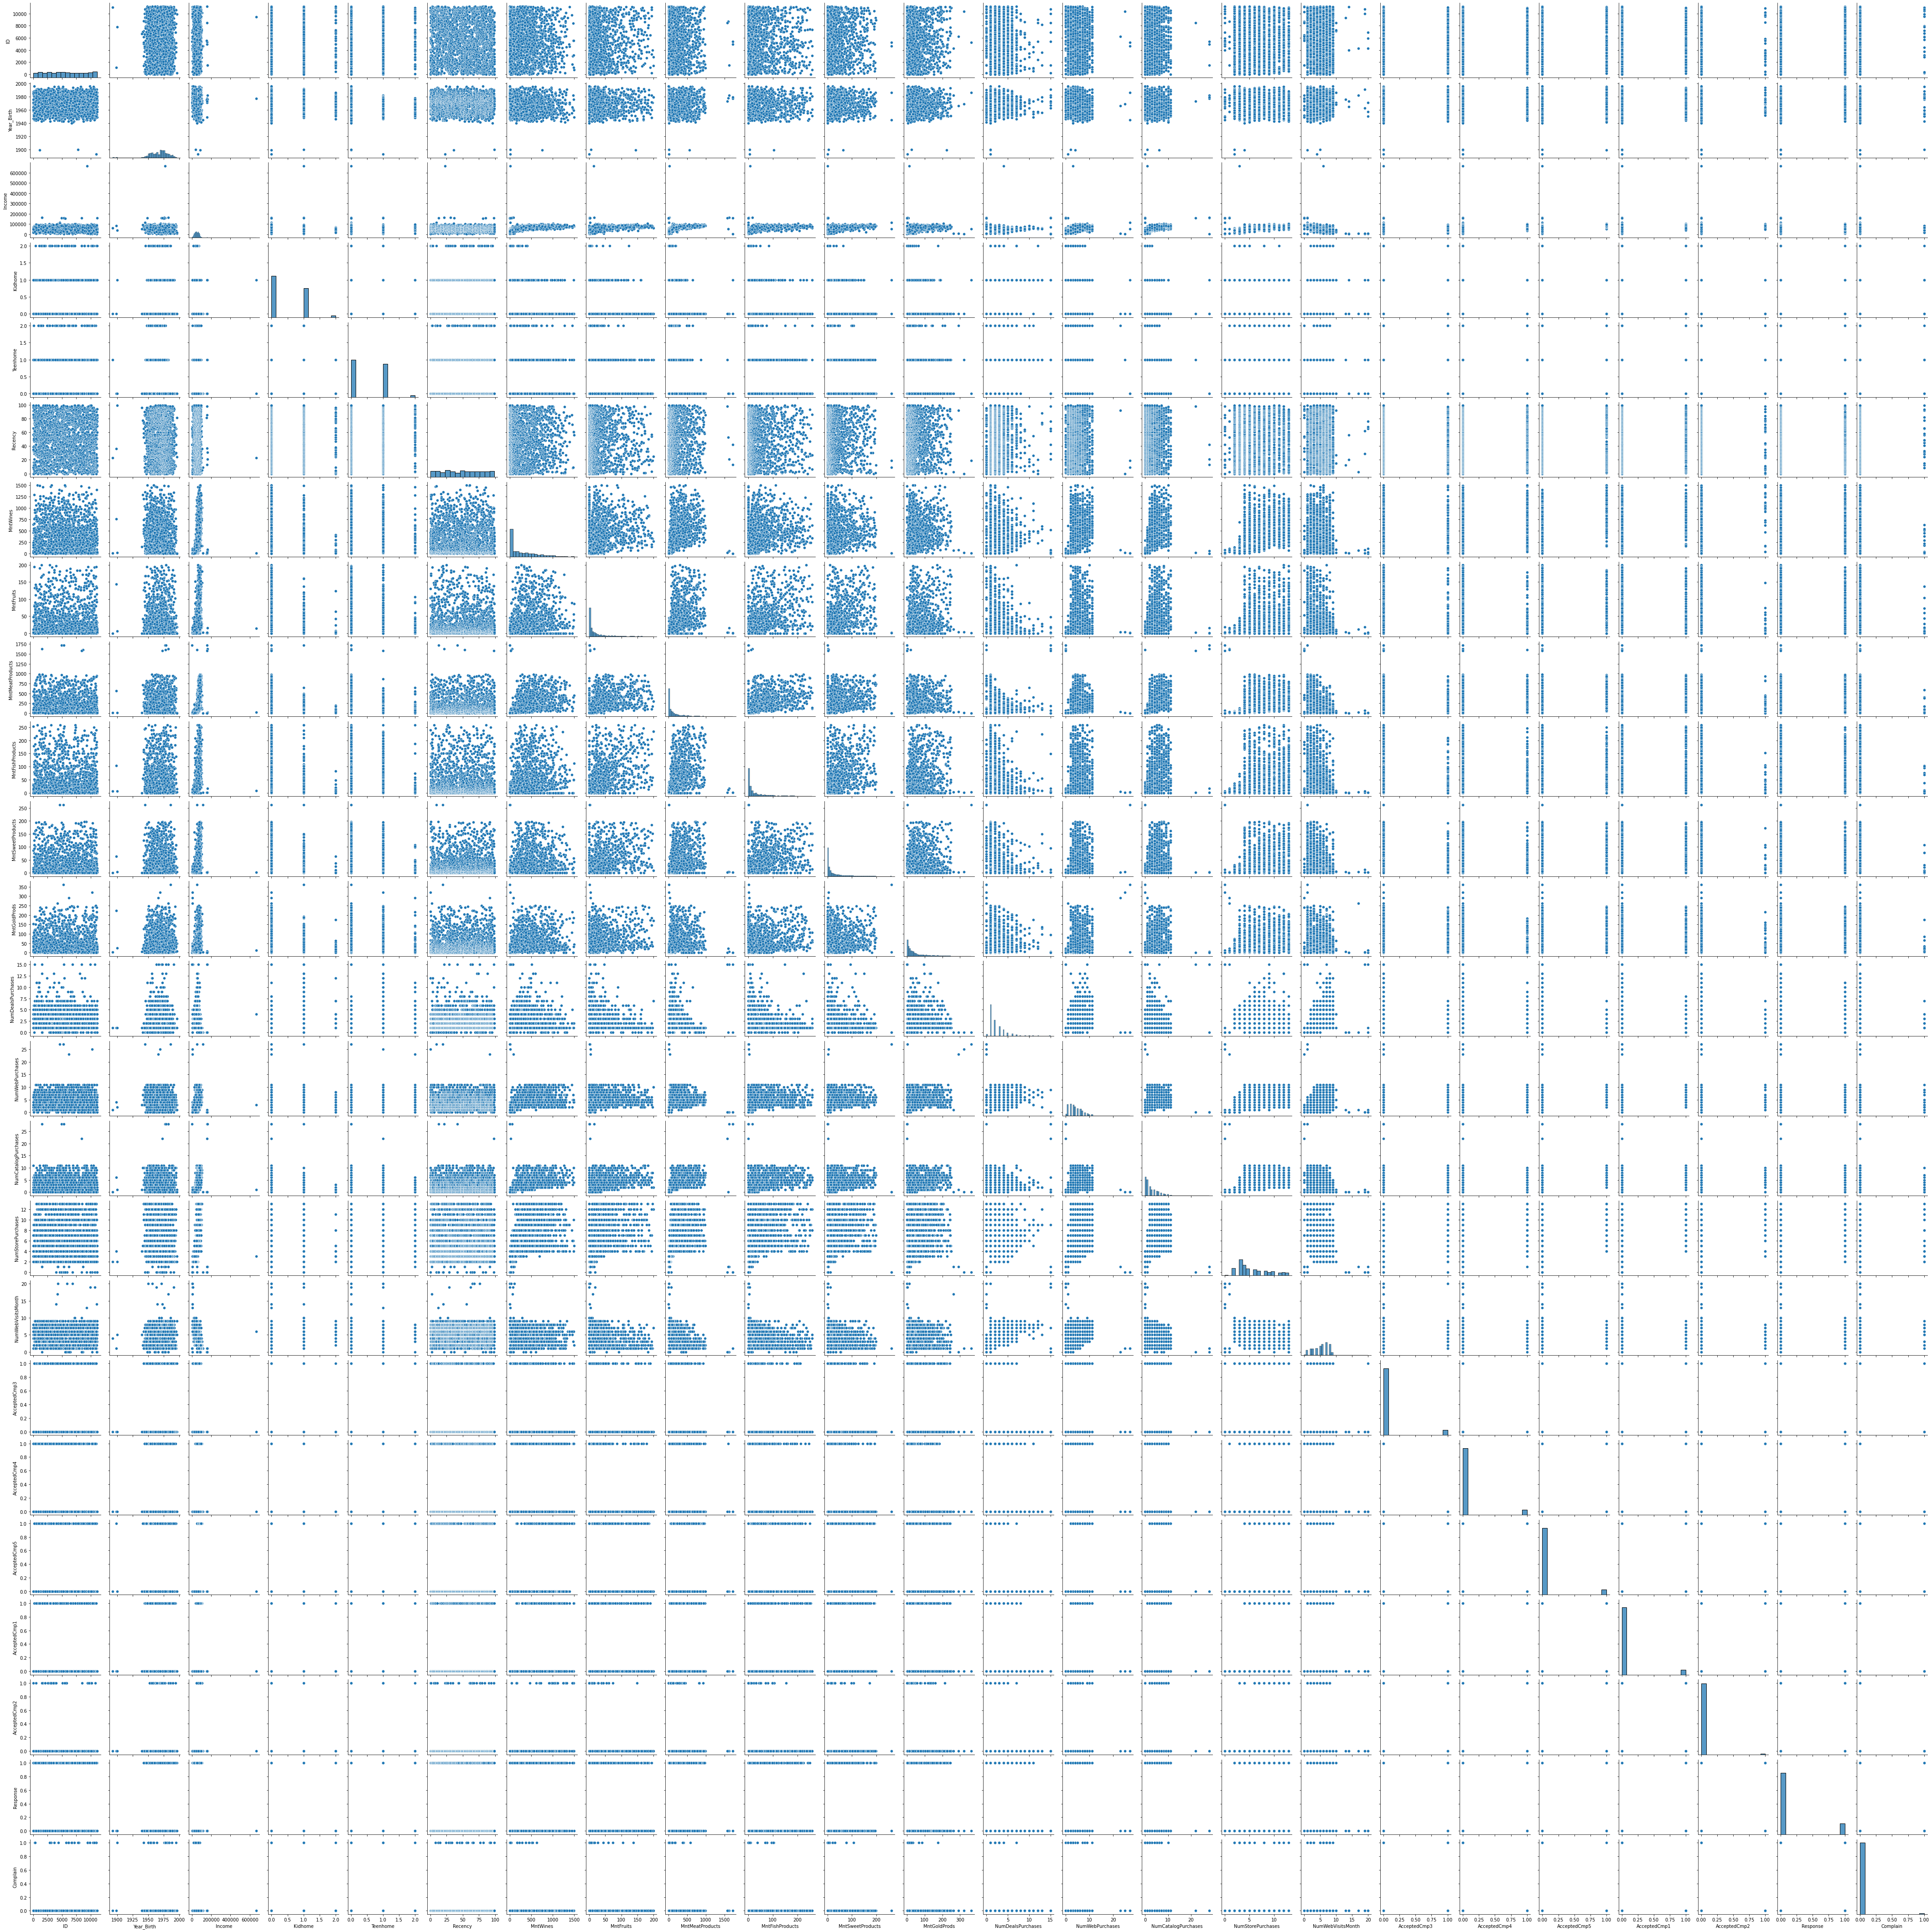

In [15]:
sns.pairplot(data)

Pair plots can be a good way to get a high level overview of the data in a data set because this shows every column visualized against every other column of data. If there are too many columns, the visual can become overwhelming to look at.
However, once you look more closely at the individual smaller charts you can see quite a few that will have distinct grouping patterns or straight lines of data. These kinds of patterns occur when there is non-continuous data values, for instance if a column only contains the values of 0 or 1. Compared to a column with values like income that are much more diverse in the range of possible displayed values, the groupings will be more dispersed. The overall pair plot is symmetrical along the diagonal (top left to bottom right). The charts above and below the diagonal are the same while the diagonal is comprised of visuals of a column displayed against itself - for instance: the top left visual is ID displayed against ID.

---------------------------------------------------------------------------------------------------------------

Let's take a look at the birth year column

In [16]:
data['Year_Birth'].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [17]:
data[data['Year_Birth'] <= 1921]

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
513   11004        1893  2n Cycle         Single  60182.0        0         1   
827    1150        1899       PhD       Together  83532.0        0         0   
2233   7829        1900  2n Cycle       Divorced  36640.0        1         0   

     Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
513   2014-05-17       23         8  ...                  2   
827   2013-09-26       36       755  ...                  4   
2233  2013-09-26       99        15  ...                  2   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
513                   4             0             0             0   
827                   1             0             0             1   
2233                  5             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  
513              0             0         0         0       SA  
827              0             0         0         0       SP  
2233             0             0         0         1      IND  

[3 rows x 28 columns]

In [18]:
data = data[data['Year_Birth'] > 1921].reset_index(drop=True)

<AxesSubplot:>

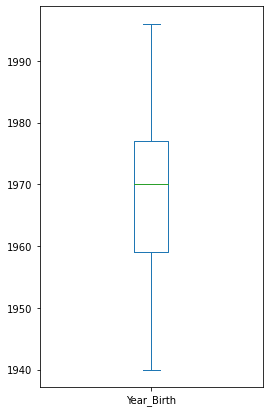

In [19]:
data['Year_Birth'].plot(kind='box', figsize=(4,7))

I decided to look at the birth year column and much to my surprise I found that the minimum birth year (in other words the eldest person) was born in 1893 and there are two others who also have birth years on or before 1921 (100 years ago this year). Seems somewhat suspicious that these are accurate years of birth, it would probably be best to remove these rows. To confirm removing those rows worked, we create a quick box plot to see the oldest birth year around 1940.

---------------------------------------------------------------------------------------------------------------

There are quite a few columns and some seem related, let's check if some can be combined

In [20]:
display(list(data.columns))

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country']

Columns Kidhome and Teenhome can be combined into DependentsAtHome

In [21]:
data['DependentsAtHome'] = data['Kidhome'] + data['Teenhome']
data['DependentsAtHome'].tail()

2232    1
2233    1
2234    1
2235    0
2236    2
Name: DependentsAtHome, dtype: int64

Just use the year the customer joined as instead of month, day and year

In [22]:
data['CustomerEnroll'] = pd.DatetimeIndex(data['Dt_Customer']).year
data['CustomerEnroll'].head()

0    2014
1    2014
2    2014
3    2014
4    2014
Name: CustomerEnroll, dtype: int64

Several columns refer to specific amounts spent but there's no total spent column

In [23]:
amnt_cols = [col for col in data.columns if 'Mnt' in col]
data['TotalAmount'] = data[amnt_cols].sum(axis=1)
data['TotalAmount'].tail()

2232     689
2233      55
2234     309
2235    1383
2236    1078
Name: TotalAmount, dtype: int64

Multiple columns regarding item purchase count but there's no total purchase count column

In [24]:
purchase_cols = [col for col in data.columns if 'Purchases' in col]
data['TotalPurchases'] = data[purchase_cols].sum(axis=1)
data['TotalPurchases'].head()

0    15
1    18
2    11
3     4
4     8
Name: TotalPurchases, dtype: int64

There are several ad campaign columns that can be totaled into a single column

In [25]:
# Include Response column as it is the response to the most recent ad campaign
campaign_cols = [col for col in data.columns if 'Cmp' in col] + ['Response']
data['TotalCampaigns'] = data[campaign_cols].sum(axis=1)
data['TotalCampaigns'].tail()

2232    0
2233    0
2234    0
2235    0
2236    3
Name: TotalCampaigns, dtype: int64

In [26]:
data[['ID', 'DependentsAtHome', 'CustomerEnroll', 'TotalAmount', 'TotalPurchases', 'TotalCampaigns']].head()

ID  DependentsAtHome  CustomerEnroll  TotalAmount  TotalPurchases  \
0   1826                 0            2014         1190              15   
1      1                 0            2014          577              18   
2  10476                 1            2014          251              11   
3   1386                 2            2014           11               4   
4   5371                 1            2014           91               8   

   TotalCampaigns  
0               1  
1               2  
2               0  
3               0  
4               2

-------------------------------------------------------------------------------------------------------------------------------------

Visualize some of the columns to see what iniital insights can be derived

In [27]:
numerical_cols = data.drop(columns='ID').select_dtypes(include=np.number)

Since we know we have some outliers in the Income column, let's limit the range for Income to be 0 to 200,000

In [28]:
numerical_cols = numerical_cols[numerical_cols['Income'] <= 200000]
numerical_cols['Income'].describe()

count      2236.000000
mean      51952.614043
std       21411.466851
min        1730.000000
25%       35502.500000
50%       51381.500000
75%       68275.750000
max      162397.000000
Name: Income, dtype: float64

-------------------------------------------------------------------------------------------------------------------------------------

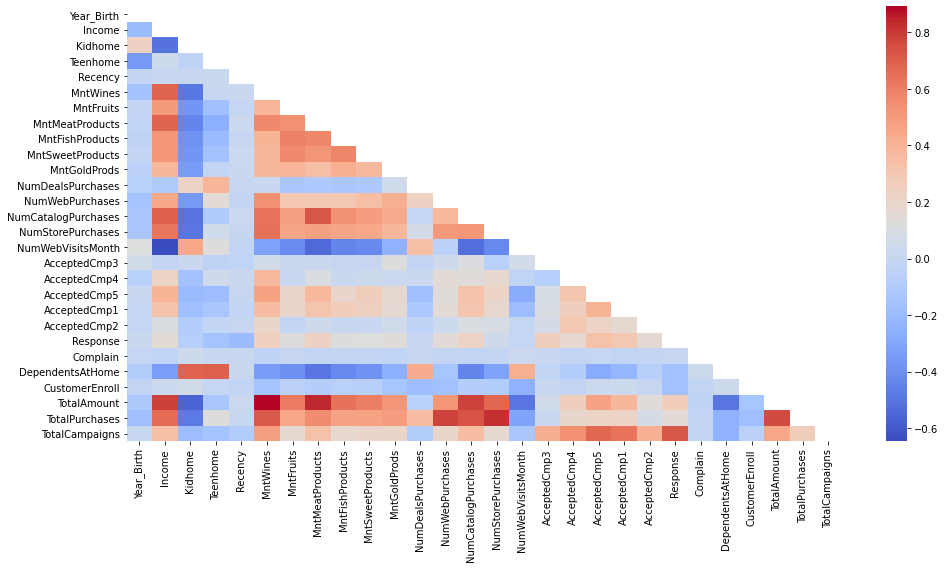

In [29]:
correlations = numerical_cols.corr()
f, ax = plt.subplots(figsize=(16, 8))
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

heatmap = sns.heatmap(correlations, mask=mask, cmap='coolwarm')

This heatmap might seem similar to the pair plot above. The overall layout is the same in that it is each column compared every other column in the data set. This subset of data is for columns that only contain numerical data values - no words, strings, or boolean values. However, what is different is tha instead of smaller charts within a bigger visual, each comparison results in a colored box. The darker red indicates a strong connection or correlation between two specific columns. The darker the blue is indicates a weaker correlation.

An interesting point from this visual is that the higher the number of "NumWebVisitsMonth" did not correlate to higher "NumWebPurchases". In other words, the more website visits in a month didn't mean that the sales from the website increased as well. Explored a bit further in the next 2 visuals below.

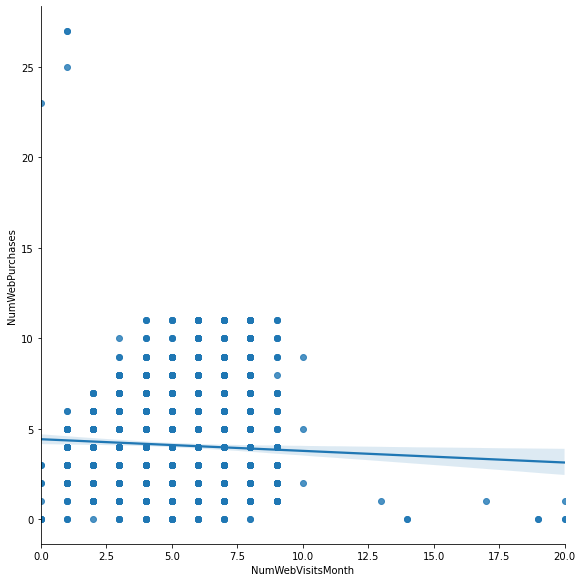

In [30]:
sns.lmplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=numerical_cols, size=8);

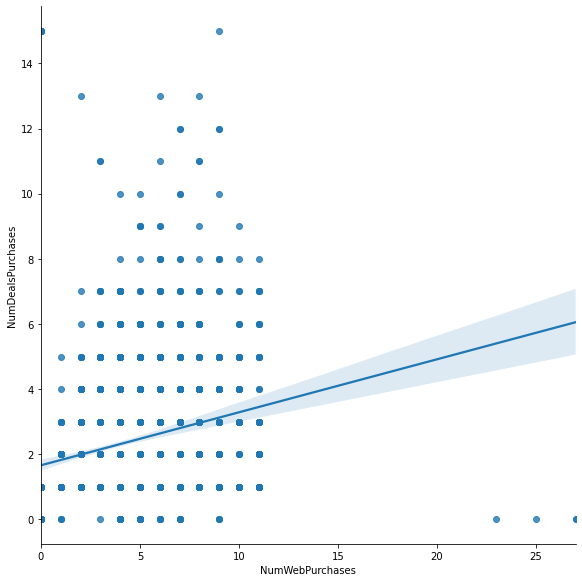

In [31]:
sns.lmplot(x='NumWebPurchases', y='NumDealsPurchases', data=numerical_cols, size=8);

-------------------------------------------------------------------------------------------------------------------------------------

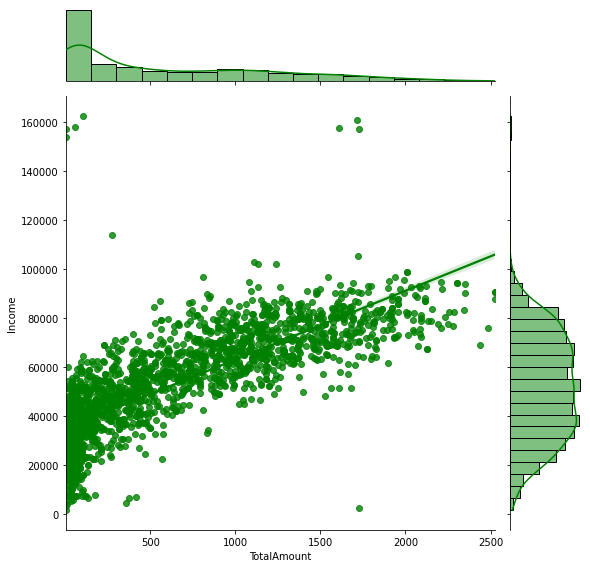

In [32]:
sns.jointplot(x='TotalAmount', y='Income', data=numerical_cols, kind='reg', height=8, color='green')

There is a generally positive connection between income level and the total amount spent; meaning the more people earn they are more likely to spend more too. This can be used to help target specific ad campaigns towards specific customers based on the amount they spend.

-------------------------------------------------------------------------------------------------------------------------------------

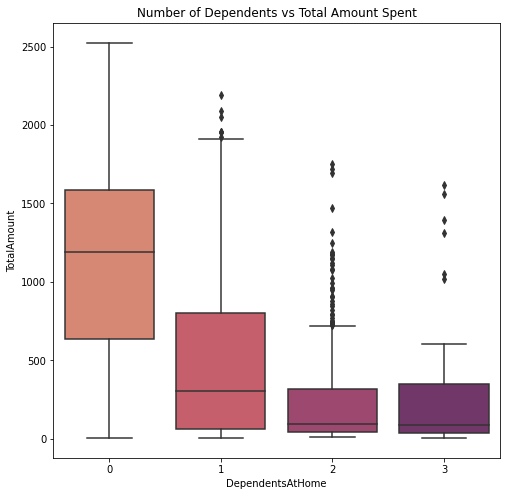

In [33]:
plt.figure(figsize=(8,8))
sns.boxplot(x='DependentsAtHome', y='TotalAmount', data=numerical_cols, palette='flare');
plt.title("Number of Dependents vs Total Amount Spent");

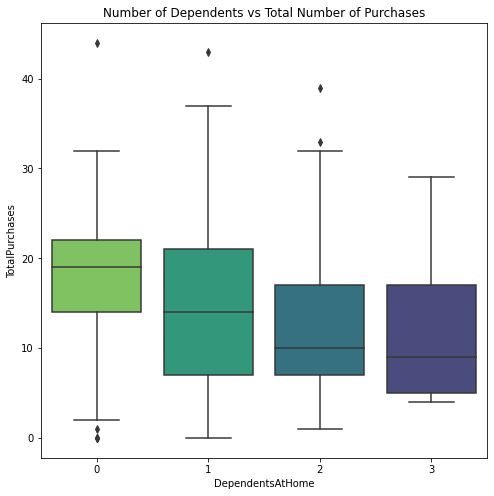

In [34]:
plt.figure(figsize=(8,8))
sns.boxplot(x='DependentsAtHome', y='TotalPurchases', data=numerical_cols, palette='viridis_r');
plt.title("Number of Dependents vs Total Number of Purchases");

It's fairly clear to see that the more kids a family has, the less total amount of money they are likely to spend. This information is useful for marketing ad campaigns because while a family may spend less and less with more and more kids - the family still will need to purchase food and child care supplies. So focusing these baby/kids related advertising towards these customers could still help to capture their limited spending from going to a different business - for instance the families with 1 dependent in the total number of purchases visual. A family with no dependents may be trying to have children and in preperation for that will need to purchase the necessary supplies and clothing for a newborn (or adopotion). Lastly, if a family has had all their dependents leave home or they are not having kids then they have more disposable income that could go towards certain items and necessities as opposed to spending that money at a competing business.

-------------------------------------------------------------------------------------------------------------------------------------

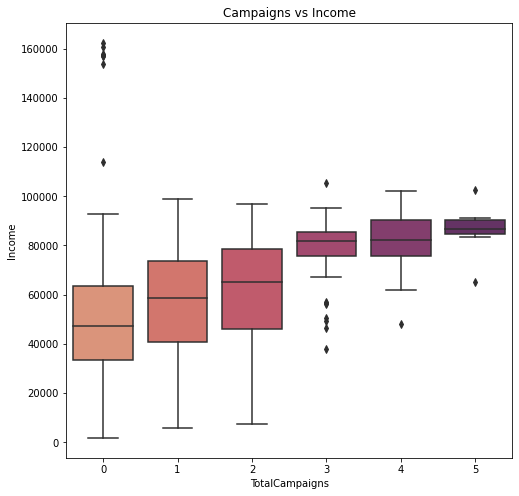

In [35]:
plt.figure(figsize=(8,8))
plt.title("Campaigns vs Income");
sns.boxplot(x='TotalCampaigns', y='Income', data=numerical_cols, palette='flare');

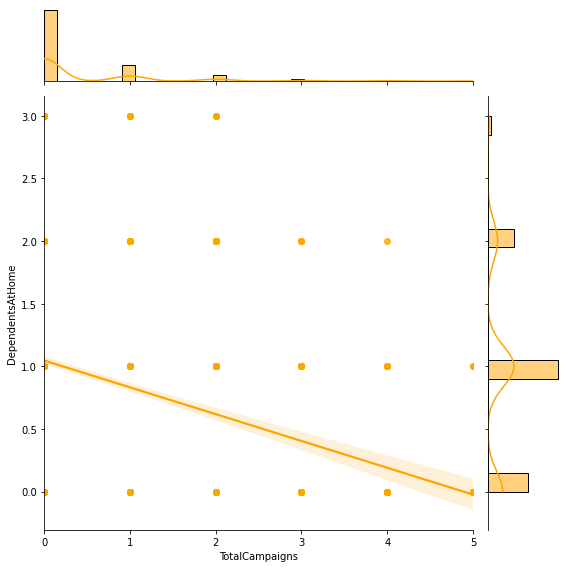

In [36]:
sns.jointplot(x='TotalCampaigns', y='DependentsAtHome', data=numerical_cols, kind='reg', height=8, color='orange')

The 'Campaigns vs Income' visual shows a general positive impact of higher income and accepting a campaign ad offer.
The visual comparing TotalCampaigns to DependentsAtHome shows a negative impact of having dependents and accepting an ad offer.

-------------------------------------------------------------------------------------------------------------------------------------

In [37]:
campaign_acceptance = pd.DataFrame(data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, columns=['Percent']).reset_index()

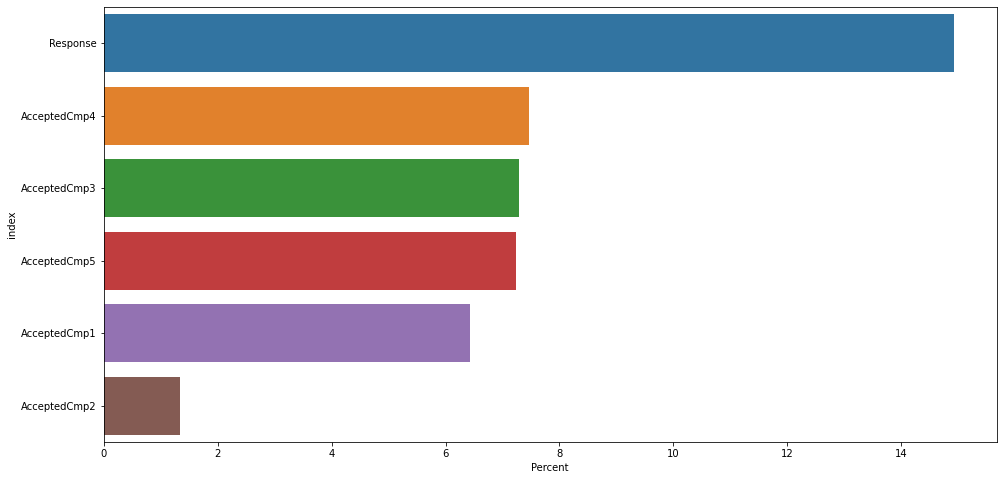

In [38]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x='Percent', y='index', data=campaign_acceptance.sort_values('Percent', ascending=False))

This visual is fairly straightforward to understand as it is each campaign (y-axis) and the respective campaign's acceptance "success" rate as a percentage (%). "Response" is the most recent marketing campaign which is the most successful.

-------------------------------------------------------------------------------------------------------------------------------------

In [39]:
campaign_countries = pd.DataFrame(data[['Country']].value_counts(), columns=['Count']).reset_index()
campaign_countries.head(8)

Country  Count
0      SP   1094
1      SA    336
2      CA    268
3     AUS    160
4     IND    147
5     GER    120
6      US    109
7      ME      3

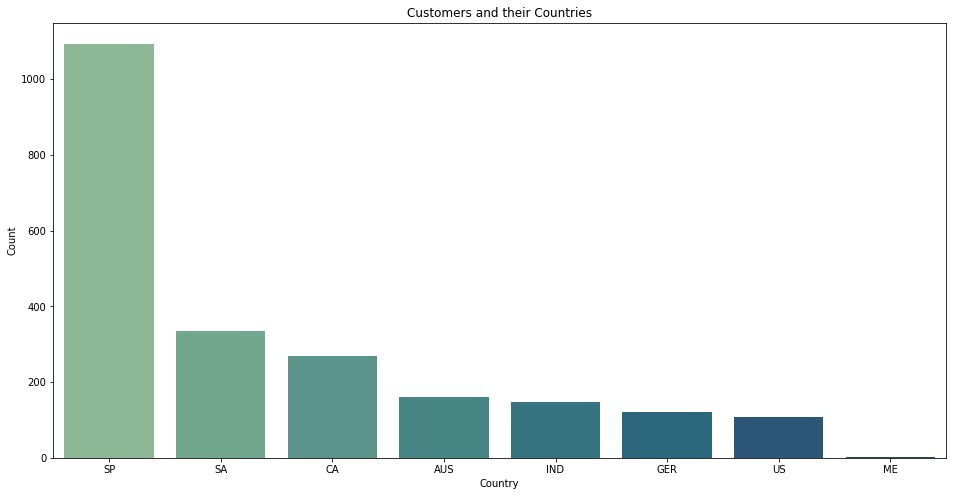

In [40]:
plt.figure(figsize=(16, 8))
sns.barplot(campaign_countries.Country, campaign_countries.Count, palette="crest")
plt.title("Customers and their Countries");

In [41]:
campaign_country_acceptances = data[['Country', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].melt(id_vars='Country', var_name='Campaigns', value_name='Accepted (%)')

In [42]:
campaign_country_acceptances = pd.DataFrame(campaign_country_acceptances.groupby(['Country', 'Campaigns'])['Accepted (%)'].mean()*100).reset_index(drop=False).sort_values('Accepted (%)', ascending=False)
display(campaign_country_acceptances)

Country     Campaigns  Accepted (%)
29      ME      Response     66.666667
26      ME  AcceptedCmp3     33.333333
41      SP      Response     16.087751
35      SA      Response     15.476190
5      AUS      Response     14.375000
11      CA      Response     14.179104
17     GER      Response     14.166667
47      US      Response     11.926606
15     GER  AcceptedCmp4      9.166667
9       CA  AcceptedCmp4      8.955224
23     IND      Response      8.843537
20     IND  AcceptedCmp3      8.843537
14     GER  AcceptedCmp3      8.333333
39      SP  AcceptedCmp4      8.135283
4      AUS  AcceptedCmp5      8.125000
40      SP  AcceptedCmp5      8.043876
10      CA  AcceptedCmp5      7.835821
38      SP  AcceptedCmp3      7.586837
21     IND  AcceptedCmp4      7.482993
44      US  AcceptedCmp3      7.339450
36      SP  AcceptedCmp1      7.129799
6       CA  AcceptedCmp1      6.716418
8       CA  AcceptedCmp3      6.716418
16     GER  AcceptedCmp5      6.666667
42      US  AcceptedCmp1      6.422018
34      SA  AcceptedCmp5      6.250000
32      SA  AcceptedCmp3      6.250000
30      SA  AcceptedCmp1      5.952381
33      SA  AcceptedCmp4      5.952381
12     GER  AcceptedCmp1      5.833333
2      AUS  AcceptedCmp3      5.625000
45      US  AcceptedCmp4      5.504587
18     IND  AcceptedCmp1      4.761905
46      US  AcceptedCmp5      4.587156
0      AUS  AcceptedCmp1      4.375000
22     IND  AcceptedCmp5      4.081633
3      AUS  AcceptedCmp4      3.750000
7       CA  AcceptedCmp2      2.238806
13     GER  AcceptedCmp2      1.666667
37      SP  AcceptedCmp2      1.462523
19     IND  AcceptedCmp2      1.360544
31      SA  AcceptedCmp2      1.190476
28      ME  AcceptedCmp5      0.000000
27      ME  AcceptedCmp4      0.000000
25      ME  AcceptedCmp2      0.000000
1      AUS  AcceptedCmp2      0.000000
43      US  AcceptedCmp2      0.000000
24      ME  AcceptedCmp1      0.000000

From this long list of words and numbers above, we can see that the most recent ad campaign "Response" was very effective in Mexico ('ME') as there was over 66% response rate. The third campaign was the only other successful campaign in Mexico with a response rate of over 33%. All the other ad campaigns had no responses in Mexico. This is even more impressive when you consider the graph of each country and the number of customers from those countries. You'll see that Mexico had the smallest number of customers and yet had such a high response rate to the most recent ad campaign and the third campaign too. However, it could be that due to the small population representing Mexico, is why the response rates for marketing capagins were so good. In general the most recent campaign "Response" was quite impactful among all the countries. From this we can presume that the "Response" campaign is the most successful campaign as it was the only one to receive responses from all countries. Presumably campaign two was the least effective as three countries didn't have any responses ('AUS', 'US', 'ME').